## Live loss plotting during training

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git['live'] # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "retail_sales.csv")

In [3]:
df_train, df_val = NeuralProphet().split_df(df, valid_p=0.1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


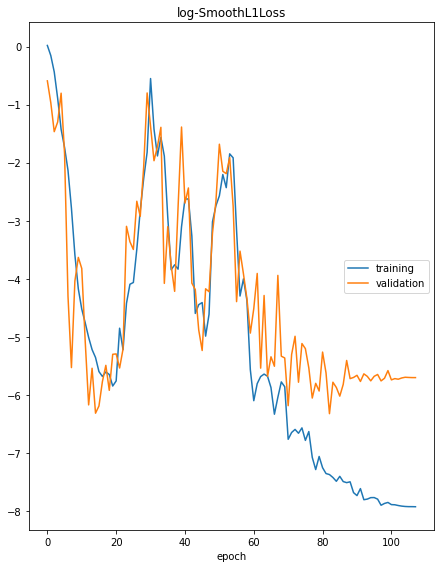

log-SmoothL1Loss
	training         	 (min:   -7.928, max:    0.020, cur:   -7.928)
	validation       	 (min:   -6.325, max:   -0.590, cur:   -5.703)


In [4]:
m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_val, progress="plot")

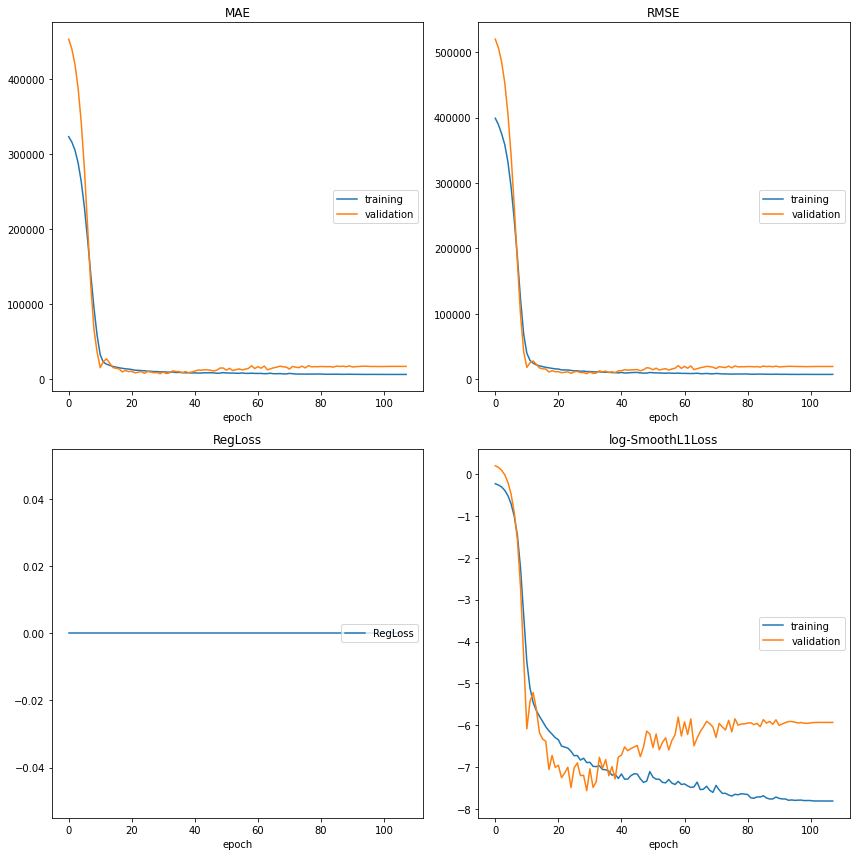

MAE
	training         	 (min: 5907.567, max: 323312.405, cur: 5907.567)
	validation       	 (min: 6978.492, max: 453438.930, cur: 16642.114)
RMSE
	training         	 (min: 7487.907, max: 399061.950, cur: 7586.051)
	validation       	 (min: 8699.636, max: 519890.633, cur: 19649.841)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	training         	 (min:   -7.806, max:   -0.233, cur:   -7.806)
	validation       	 (min:   -7.559, max:    0.195, cur:   -5.929)


In [5]:
m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")